In [2]:
#IMPORT ALL LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
#LOAD THE DATASET
df = pd.read_csv('insurance.csv')

#DESCRIBE THE DATA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
#CHECKING NULL ON COLUMN
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Step 1. Descriptive Statistic Analysis

In [5]:
df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_category'] = '18-35'
df.loc[(df['age'] >= 36) & (df['age'] <= 55), 'age_category'] = '36-55'
df.loc[df['age'] > 55, 'age_category'] = '> 55'
df['age_category'].value_counts()

18-35    574
36-55    548
> 55     216
Name: age_category, dtype: int64

## 03. Average Age

Average age of the data: 39.21


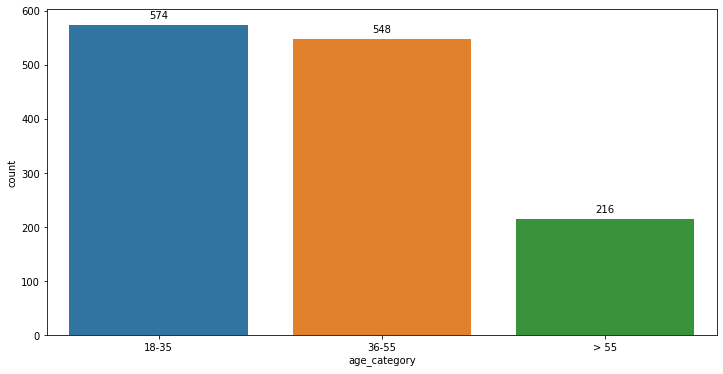

In [6]:
print ("Average age of the data: {:.2f}" .format(df['age'].mean()))

plt.figure(figsize = (12, 6))
splot = sns.countplot(x='age_category', data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

## 04. BMI Average of Smoker

BMI average: 30.66
BMI average of smoker: 30.71


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

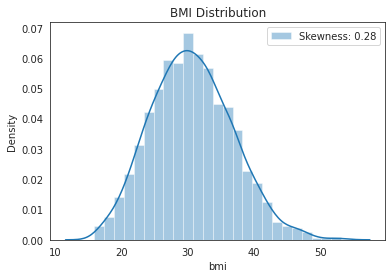

In [7]:
print ("BMI average: {:.2f}" .format(df['bmi'].mean()))
print ("BMI average of smoker: {:.2f}" .format(df.loc[df['smoker'] == 'yes']['bmi'].mean()))

#DISTRIBUTION OF TOTAL BMI
sns.set_style('white')
sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')

## 05. Charges Variance of Smoker and Non Smoker

/tmp/ipykernel_430/2794369443.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[['smoker', 'charges']].var())


charges    1.466524e+08
dtype: float64
mean:  13270.422265141257
133207311.20634924
133207311.20634924
35925420.496111736


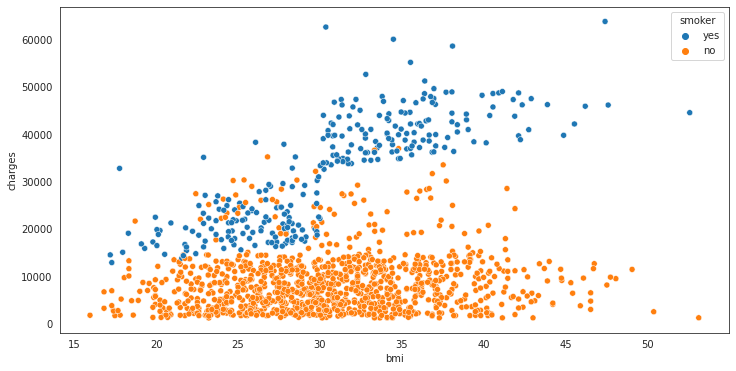

In [45]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

print(df[['smoker', 'charges']].var())

print ('mean: ', df['charges'].mean())

data_var = df.copy()
data_var_smoker = data_var.loc[data_var['smoker'] == 'yes']
data_var_non_smoker = data_var.loc[data_var['smoker'] == 'no']

print(data_var_smoker['charges'].var())

print (df.loc[df['smoker'] == 'yes']['charges'].var())
print (df.loc[df['smoker'] == 'no']['charges'].var())

## 06. Age Average of Women & Men (smoker)

                     age        bmi  children       charges   charges_int  \
sex    smoker                                                               
female yes     38.608696  29.608261  1.008696  30678.996276  30678.469565   
male   yes     38.446541  31.504182  1.188679  33042.005975  33041.515723   

                 bmi_int  
sex    smoker             
female yes     29.095652  
male   yes     30.981132  
age  sex     bmi     children  smoker  region     charges      age_category  charges_int  bmi_int
18   female  21.660  0         yes     northeast  14283.45940  18-35         14283        21         1
49   female  23.845  3         yes     northeast  24106.91255  36-55         24106        23         1
48   female  25.850  3         yes     southeast  24180.93350  36-55         24180        25         1
47   female  36.630  1         yes     southeast  42969.85270  36-55         42969        36         1
             27.830  0         yes     southeast  23065.42070  36-55     

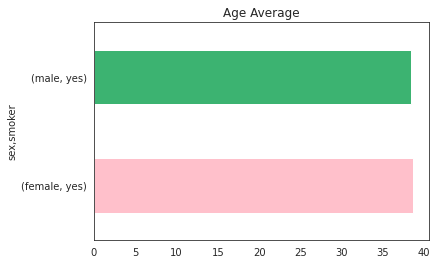

In [53]:
smoker_male = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='male')]
smoker_female = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='female')]
#print ("Age average of male smoker: {:.2f}" .format(smoker_male['age'].mean()))
#print ("Age average of female smoker: {:.2f}" .format(smoker_female['age'].mean()))

df_age_avg_smoker = (df[df['smoker'].isin(['yes'])]
         .groupby(['sex','smoker'])
         .agg(np.mean))

print (df_age_avg_smoker)
df_age_avg_smoker.plot(kind = "barh", y = "age", legend = False, color=['pink', 'mediumseagreen'],
            title = "Age Average")

print (smoker_female.value_counts())
print (smoker_male.value_counts())


## 07. Average of Charges for Smoker and Non-Smoker

Average smokers health charges: 32050.23
Average non-smokers health charges: 8434.27
              age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Average Charges'}, ylabel='smoker'>

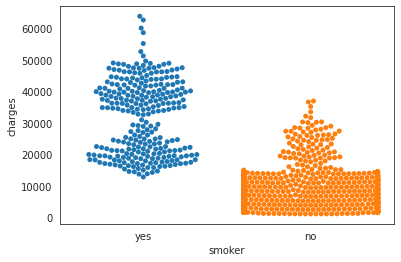

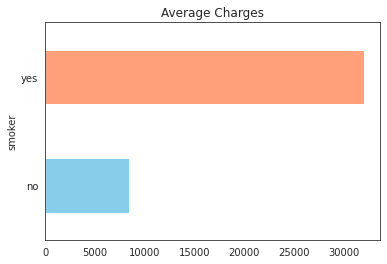

In [10]:
sns.swarmplot(x=df['smoker'],y=df['charges'])

print ('Average smokers health charges: {:.2f}'.format(df.loc[df['smoker'] == 'yes']['charges'].mean()))
print ('Average non-smokers health charges: {:.2f}'.format(df.loc[df['smoker'] == 'no']['charges'].mean()))

df_charges_avg_smoker = (df[df['smoker'].isin(['yes', 'no'])]
         .groupby(['smoker'])
         .agg(np.mean))

print (df_charges_avg_smoker)
df_charges_avg_smoker.plot(kind = "barh", y = "charges", legend = False, color=['skyblue', 'lightsalmon'],
            title = "Average Charges")

## 08. Charges average of Smoker and Non-Smoker (BMI > 25)

Average smokers health charges (BMI>25): 35116.91
Average non-smokers health charges (BMI>25: 8629.59


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


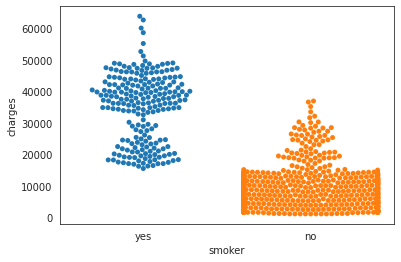

In [11]:
bmi_upper_25 = df.loc[df['bmi']>25]
sns.swarmplot(x='smoker',y='charges', data=bmi_upper_25)

smoker_bmi = df.loc[(df['smoker'] == 'yes')&(df['bmi'] >25)]
non_smoker_bmi = df.loc[(df['smoker'] == 'no')&(df['bmi'] >25)]

print ('Average smokers health charges (BMI>25): {:.2f}'.format(smoker_bmi['charges'].mean()))
print ('Average non-smokers health charges (BMI>25: {:.2f}'.format(non_smoker_bmi['charges'].mean()))

## 09. BMI Average of Female and Male

BMI average of Female: 30.38
BMI average of Male: 30.94
              age        bmi  children       charges
sex                                                 
female  39.503021  30.377749  1.074018  12569.578844
male    38.917160  30.943129  1.115385  13956.751178


<AxesSubplot:title={'center':'Average BMI'}, ylabel='sex'>

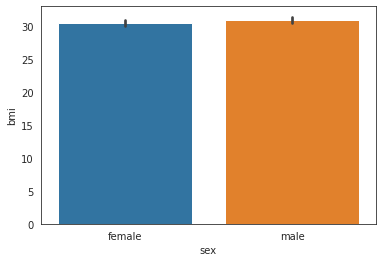

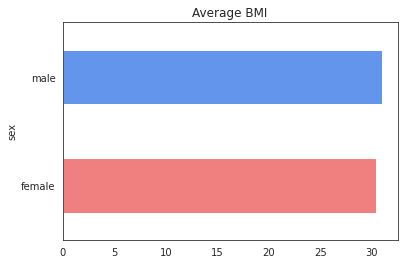

In [12]:
print("BMI average of Female: {:.2f}".format(df.loc[df['sex']=='female']['bmi'].mean()))
print("BMI average of Male: {:.2f}".format(df.loc[df['sex']=='male']['bmi'].mean()))

sns.barplot(x='sex',y='bmi', data=df)

df_bmi_avg = (df[df['sex'].isin(['female', 'male'])]
         .groupby(['sex'])
         .agg(np.mean))

print (df_bmi_avg)
df_bmi_avg.plot(kind = "barh", y = "bmi", legend = False, color=['lightcoral','cornflowerblue'],
            title = "Average BMI")

## 10. BMI Average of Smoker and Non-Smoker

BMI average of Smoker: 30.71
BMI average of Non-Smoker: 30.65


<AxesSubplot:xlabel='smoker', ylabel='bmi'>

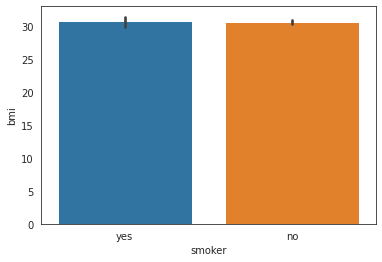

In [13]:
print("BMI average of Smoker: {:.2f}".format(df.loc[df['smoker']=='yes']['bmi'].mean()))
print("BMI average of Non-Smoker: {:.2f}".format(df.loc[df['smoker']=='no']['bmi'].mean()))

sns.barplot(x='smoker',y='bmi', data=df)

# Step 2. Categoric Variable Analysis

## 01. Gender has the highest charges

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


age                      54
sex                  female
bmi                   47.41
children                  0
smoker                  yes
region            southeast
charges         63770.42801
age_category          36-55
Name: 543, dtype: object


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


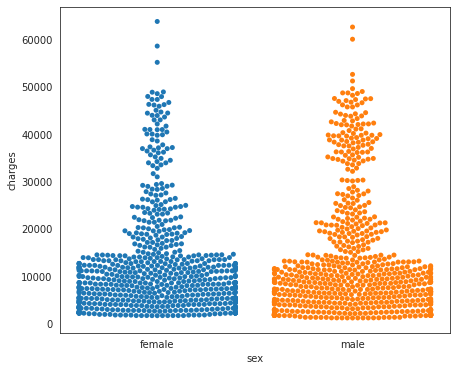

In [14]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.swarmplot(x='sex',y='charges', data=df)
print (df.loc[df['charges'].idxmax()])

## 02. Probability distribution of charges by region

Text(0.5, 1.0, 'Charges by Region')

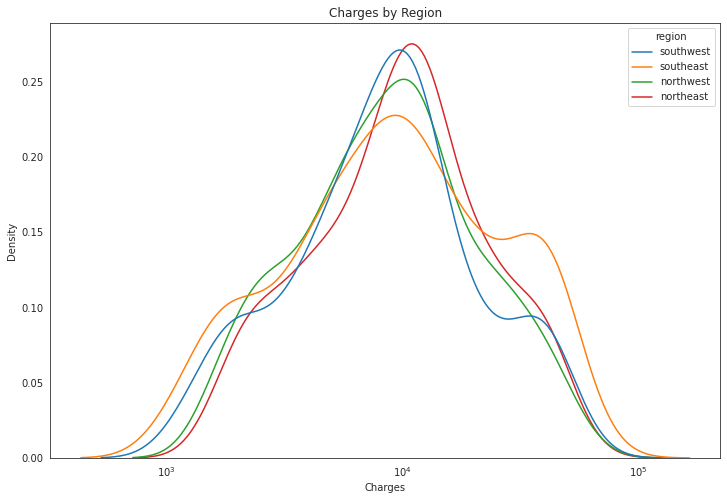

In [47]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data=df, x="charges", hue='region', log_scale=True)
plt.xlabel('Charges')
plt.title('Charges by Region')

## 03. Data proportion by region

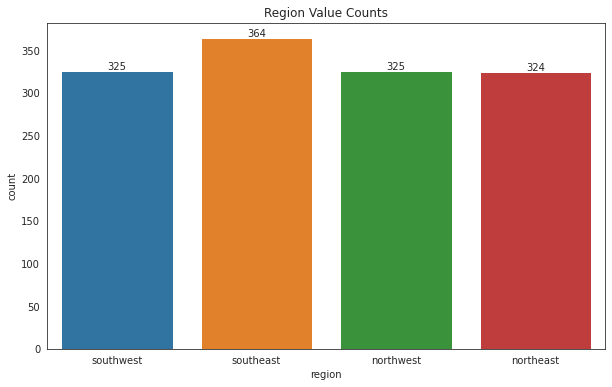

In [16]:
# Countplot with percentage

total = len(df)
plt.figure(figsize = (10, 6))
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = df)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

## 04. The highest data proportion (smoker or non-smoker) by region

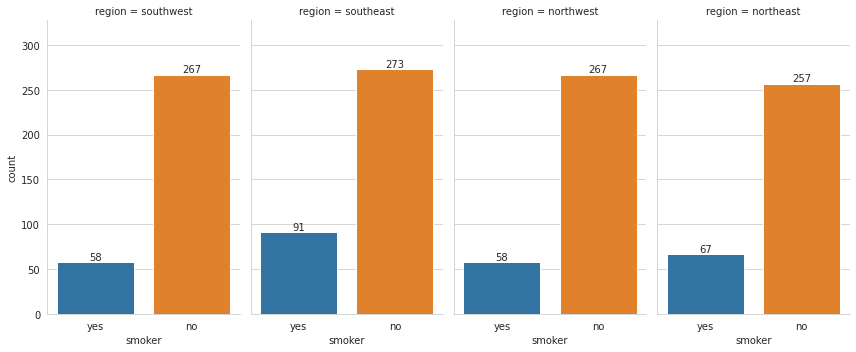

In [17]:
sns.set_style('whitegrid')
graph = sns.catplot(x = 'smoker', col = 'region', data = df, kind = 'count', aspect = 0.6)

# iterate through axes
for ax in graph.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

## 05. Probability female given smoker P(Female | smoker)?

sex     smoker
female  no        0.514098
        yes       0.419708
male    no        0.485902
        yes       0.580292
dtype: float64


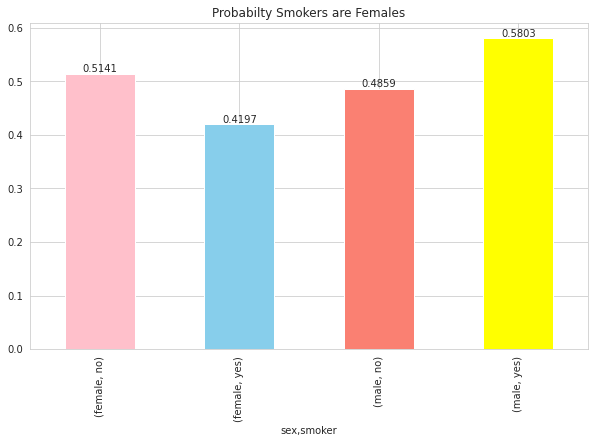

In [18]:
#SIMPLE CALCULATION FROM DATASET
smoker_prob = df.groupby('smoker').size().div(len(df))
gender_prob = df.groupby(['sex', 'smoker']).size().div(len(df)).div(smoker_prob, axis=0, level='smoker')
print (gender_prob)
plt.figure(figsize = (10, 6))
ax = gender_prob.plot(kind = "bar", y = "smoker", legend = False, color=['pink', 'skyblue', 'salmon', 'yellow'],
            title = "Probabilty Smokers are Females")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.4f}'.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

## 06. Probability male given smoker P(Male | smoker)?

In [19]:
#MANUAL CONDITIONAL PROBABILITY CALCULATIONS
female_smoker = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='female')]
male_smoker = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='male')]
smoker = df.loc[df['smoker']=='yes']

print ('P (Female | Smoker): {:.4f}'.format(len(female_smoker)/len(smoker)))
print ('P (Male | Smoker): {:.4f}'.format(len(male_smoker)/len(smoker)))


P (Female | Smoker): 0.4197
P (Male | Smoker): 0.5803


## 07. Distribution of charges by region

Text(0.5, 1.0, 'Charges by Region')

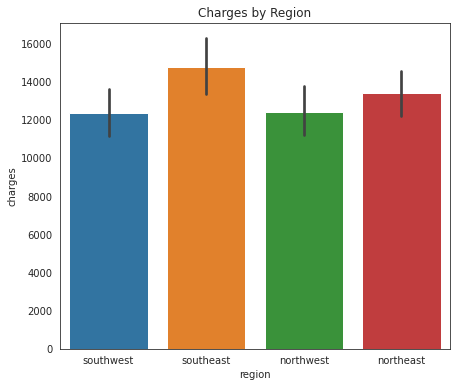

In [20]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'region', y = 'charges', data = df)
plt.title('Charges by Region')

# Step 3. Analysis of Continuous Variable

## 01. Probability of charges given BMI

charges      bmi   
1121.87390   23.210    1.0
1131.50660   30.140    1.0
1135.94070   33.330    1.0
1136.39940   33.660    1.0
1137.01100   34.100    1.0
                      ... 
55135.40209  35.530    1.0
58571.07448  38.095    1.0
60021.39897  34.485    1.0
62592.87309  30.360    1.0
63770.42801  47.410    1.0
Name: bmi, Length: 1337, dtype: float64
          charges     bmi
0     16884.92400  27.900
1      1725.55230  33.770
2      4449.46200  33.000
3     21984.47061  22.705
4      3866.85520  28.880
...           ...     ...
1333  10600.54830  30.970
1334   2205.98080  31.920
1335   1629.83350  36.850
1336   2007.94500  25.800
1337  29141.36030  29.070

[1338 rows x 2 columns]
bmi          15.960  16.815  17.195  17.290  17.385  17.400  17.480  17.670  \
charges                                                                       
1121.87390      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1131.50660      0.0     0.0     0.0     0.0     0.0     0.0     0.0  

<Figure size 864x432 with 0 Axes>

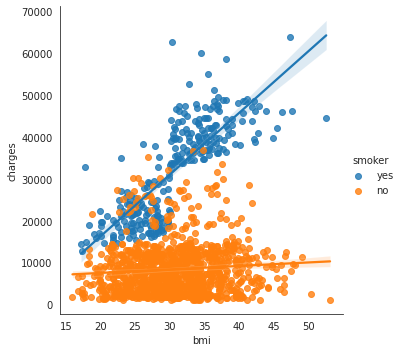

In [41]:
plt.figure(figsize = (12, 6))
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

count_prob =  df.groupby('charges')['bmi'].value_counts()
prob = df.groupby('charges')['bmi'].value_counts() / df.groupby('charges')['bmi'].count()

print (prob)

print (df[["charges", "bmi"]])
print (pd.crosstab(df.charges, df.bmi, normalize='columns'))


## 02. Probability (Charges > 16.700 | BMI > 25)

In [ ]:
#MANUAL CALCULATION OF CHARGES AND BMI
bmi = df.loc[df['bmi']>25]
charges_bmi = df.loc[(df['bmi']>25) & (df['charges']>16700)]

print ('P (Charges > 16.700 | BMI > 25): {:.4f}'.format(len(charges_bmi)/len(bmi)))

P (Charges > 16.700 | BMI > 25): 0.2594


## 03. Probability (Charges > 16.700 | Smoker)

In [ ]:
charges_smoker = df.loc[(df['smoker']=='yes') & (df['charges']>16700)]

print ('P (Charges > 16.700 | Smoker): {:.4f}'.format(len(charges_smoker)/len(smoker)))

P (Charges > 16.700 | Smoker): 0.9270


## 04. Possibility of Probability (Charges > 16.700 | BMI < 25)

In [ ]:
#MANUAL CALCULATION OF CHARGES AND BMI
bmi_under_25 = df.loc[df['bmi']<25]
charges_bmi_under_25 = df.loc[(df['bmi']<25) & (df['charges']>16700)]

print ('P (Charges > 16.700 | BMI < 25): {:.4f}'.format(len(charges_bmi_under_25)/len(bmi_under_25)))

P (Charges > 16.700 | BMI < 25): 0.2082


- P (Charges > 16.700 | BMI > 25): 0.2594
- P (Charges > 16.700 | BMI < 25): 0.2082

Probabilitas yang mungkin terjadi adalah seseorang yang BMI nya di atas 25 mendapatkan tagihan di atas 16.700

## 05. Possibility of Probability (Charges > 16.700 | BMI > 25 & Smoker)

In [ ]:
smoker_bmi_25 = df.loc[(df['charges']>16700) & (df['bmi']>25) & (df['smoker']=='yes')]
print ('P (Charges > 16.700 | BMI > 25 & Smoker): {:.4f}'.format(len(smoker_bmi_25)/len(df)))

P (Charges > 16.700 | BMI > 25 & Smoker): 0.1607


In [ ]:
non_smoker_bmi_25 = df.loc[(df['charges']>16700) & (df['bmi']>25) & (df['smoker']=='no')]
print ('P (Charges > 16.700 | BMI > 25 & Non-smoker): {:.4f}'.format(len(non_smoker_bmi_25)/len(df)))

P (Charges > 16.700 | BMI > 25 & Non-smoker): 0.0508


- P (Charges > 16.700 | BMI > 25 & Smoker): 0.1607
- P (Charges > 16.700 | BMI > 25 & Non-smoker): 0.0508

Probabilitas yang mungkin terjadi adalah seorang perokok yang BMI nya di atas 25 mendapatkan tagihan di atas 16.700

# Step 4. Variable Correlation Analysis

In [55]:
df_cat = df.copy()
df_cat["sex"] = df_cat["sex"].astype('category')
df_cat["smoker"] = df_cat["smoker"].astype('category')
df_cat["region"] = df_cat["region"].astype('category')


In [57]:
df_cat["sex_cat"] = df_cat["sex"].cat.codes
df_cat["smoker_cat"] = df_cat["smoker"].cat.codes
df_cat["region_cat"] = df_cat["region"].cat.codes

df_cat.head()

,age,sex,bmi,children,smoker,region,charges,age_category,charges_int,bmi_int,sex_cat,smoker_cat,region_cat
0,19,female,27.900,0,yes,southwest,16884.92400,18-35,16884,27,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,18-35,1725,33,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,18-35,4449,33,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,18-35,21984,22,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,18-35,3866,28,1,0,1


Text(0.5, 1.0, 'Correlation Between Numerical Variables')

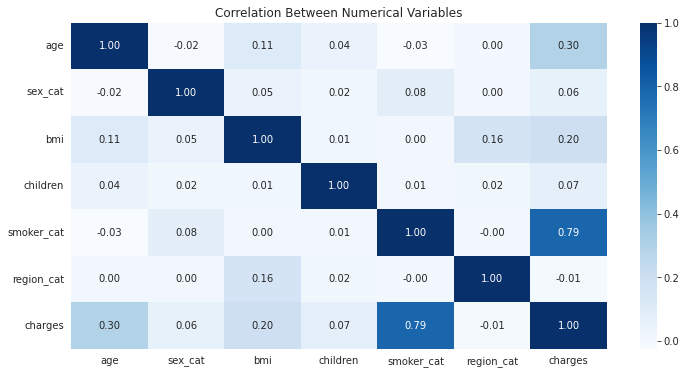

In [59]:
correlation = df_cat[['age', 'sex_cat', 'bmi', 'children', 'smoker_cat', 'region_cat', 'charges']].corr()
plt.figure(figsize = (12, 6))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Between Numerical Variables')

# Step 5. Testing the Hypothesis

## 01. Hipotesis: Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

Text(0.5, 1.0, 'Charges by Smoker')

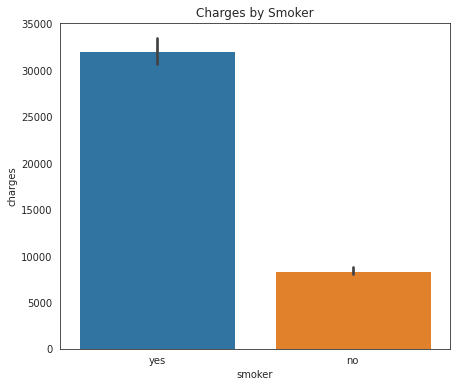

In [ ]:
    sns.set_style('white')
    plt.figure(figsize = (7, 6))
    sns.barplot(x = 'smoker', y = 'charges', data = df)
    plt.title('Charges by Smoker')

## 02. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [ ]:
df.loc[df['bmi']> 25, 'bmi_category'] = 'more_25'
df.loc[df['bmi']< 25, 'bmi_category'] = 'less_25'
df['bmi_category'].value_counts()

more_25    1091
less_25     245
Name: bmi_category, dtype: int64

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,18-35,more_25
1,18,male,33.770,1,no,southeast,1725.55230,18-35,more_25
2,28,male,33.000,3,no,southeast,4449.46200,18-35,more_25
3,33,male,22.705,0,no,northwest,21984.47061,18-35,less_25
4,32,male,28.880,0,no,northwest,3866.85520,18-35,more_25


Text(0.5, 1.0, 'Charges by BMI Category')

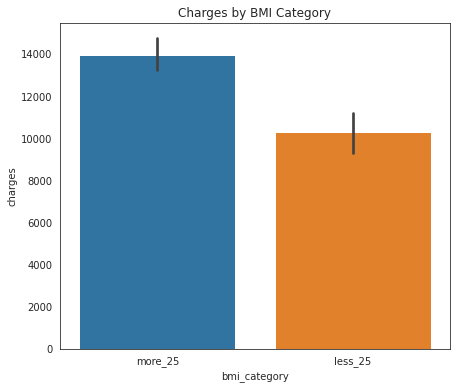

In [ ]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'bmi_category', y = 'charges', data = df)
plt.title('Charges by BMI Category')

## 03. Tagihan kesehatan laki-laki lebih besar dari perempuan

Text(0.5, 1.0, 'Charges by Gender')

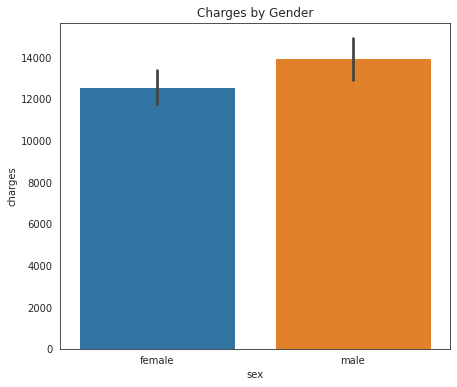

In [ ]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('Charges by Gender')